# More on autocorrelation
First, rewrite your Durbin-Watson statistic calculator function.  Use [the Wikipedia article](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) as reference, but don't just copy and paste the code from yesterday.  As a data scientist, it's important that you be able to translate mathematical formulas into code.  The function should take as input the residuals (just a 1d array of numbers) and output the Durbin-Watson statistic, which is used to determine the presence or absense of first order serial correlation.

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def myDurbinWatson(residuals):
    d = 0.0
    for i in range(len(residuals)-1):
        d += (residuals[i] - residuals[i+1])**2
    divisor = sum([x**2 for x in residuals])
    d /= divisor
    return d

## Linear model with noise
Now, reproduce the linear model with noise that we created yesterday.  Again, don't copy and paste from yesterday.  Think about what we're trying to produce: simply a line of the form $y = mx + b + \epsilon$, where $\epsilon$ is a white noise error term (a sequence of random draws from a normal distribution is an example of a white noise error term).

In [20]:
x = np.linspace(0,10)
y = 2.0 * x + np.random.normal(loc=0.0,scale=0.1,size=len(x))

x = x.reshape(-1,1)

In [21]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
yHat = lr.predict(x)

Plot the residuals

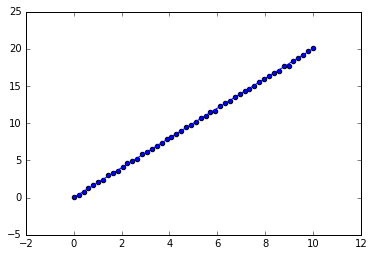

In [23]:
plt.scatter(x,y)
plt.plot(x,yHat)

In [24]:
residuals = y - yHat
d = myDurbinWatson(residuals)
d

2.4387415372693999

You should notice that the plot above doesn't show much of a pattern, if any.  In fact, the Durbin-Watson statistic calculated above, which is close to 2.0, indicates that there is no first-order serial correlation in the residuals.

What happens if we calculate the Durbin-Watson statistic on y?

In [25]:
yDW = myDurbinWatson(y)
yDW

0.001330957838661963

It's pretty close to 0.  This is because the value of $y_i$ is very close to the value of $y_{i-1}$, for all $y$ in the series.

How do you think the Durbin-Watson statistic for $y$ will compare to the Durbin-Watson statistic for $\hat{y}$?

In [26]:
yHatDW = myDurbinWatson(yHat)
yHatDW

0.0012095737265461625

It's a little smaller, because there is no noise in this variable.

## Introduction to autoregression
When we are trying to model time series data, we are working off of one fundamental assumption: the present is related to the past; hence the future is related to the present, and we can extrapolate our current data to PREDICT THE FUTURE!!!

Autoregression is when we regress $y$ on past values of itself.  Here, we are going to generate artificial data to mimic this process that does occur with real data.

Generate a series of 50 y values that follow the formula $y_t = 0.9y_{t-1}$, and initialize your $y_0$ to be 10.  Plot the resulting series.

In [29]:
y = [10]

for i in range(49):
    y.append(y[i]*0.9)

y

[10,
 9.0,
 8.1,
 7.29,
 6.561,
 5.9049000000000005,
 5.3144100000000005,
 4.7829690000000005,
 4.3046721,
 3.8742048900000006,
 3.4867844010000004,
 3.1381059609000004,
 2.82429536481,
 2.541865828329,
 2.2876792454961,
 2.05891132094649,
 1.853020188851841,
 1.6677181699666568,
 1.5009463529699911,
 1.350851717672992,
 1.2157665459056928,
 1.0941898913151236,
 0.9847709021836112,
 0.88629381196525,
 0.7976644307687251,
 0.7178979876918525,
 0.6461081889226673,
 0.5814973700304006,
 0.5233476330273605,
 0.47101286972462447,
 0.423911582752162,
 0.38152042447694584,
 0.34336838202925124,
 0.30903154382632614,
 0.27812838944369356,
 0.2503155504993242,
 0.2252839954493918,
 0.2027555959044526,
 0.18248003631400736,
 0.16423203268260664,
 0.14780882941434598,
 0.13302794647291138,
 0.11972515182562025,
 0.10775263664305823,
 0.0969773729787524,
 0.08727963568087717,
 0.07855167211278945,
 0.0706965049015105,
 0.06362685441135946,
 0.05726416897022351]

So you see a series of exponential decay.

Now what happens if you add a white noise error term to your model, so that $y_t = 0.9y_{t-1} + \epsilon$ ?

Play around with different values for the scale parameter of `np.random.normal`.  For example, try 0.1, 1.0, and 10.0.

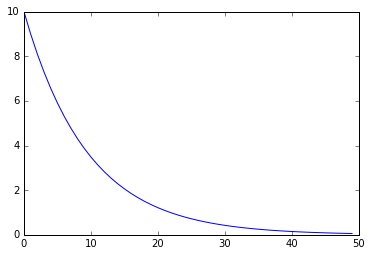

In [30]:
plt.plot(y)

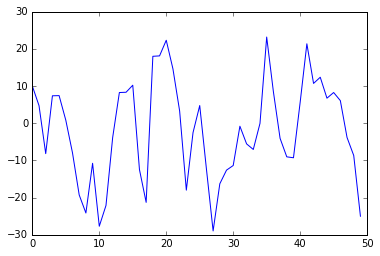

In [34]:
z = [10]

for i in range(49):
    z.append(z[i]*0.9 + np.random.normal(loc=0.0, scale=10.0))

plt.plot(z)

You have just created an autoregressive model of order 1, or AR(1).  Congrats!  This is how econometricians model many time series, after taking into account seasonality.

## But what about negative serial correlation?
We talked about how no serial correlation is associated with Durbin-Watson values around 2.0, positive serial correlation is associated with values close to 0.0, but what about the side that is above 2.0, close to 4.0?  This corresponds to negative serial correlation.  Negative serial correlation is when subsequent values tend to be the opposite of each other.

Simulate this by re-initializing y as we first did, but add the noise in the following way: at t=0, make it positive noise; at t=1, make it negative noise; at t=2, make it positive noise; at t=3, make it negative noise; etc.  Then refit a line to this new data, and calculate the Durbin-Watson statistic.

Plot the residuals

Though it may be hard to tell, there is a more systematic pattern to the residuals plotted above: positive, negative, positive, negative, etc.